# Exploratory Data Analysis

In [1]:
## importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
##read text file.
data = pd.read_table('kaggle_visible_evaluation_triplets.txt', header = None)
## reanming column names.
data.columns = ['user_id', 'song_id', 'freq'] 

## reading text file
data_2 = pd.read_table('unique_tracks.txt', sep = '<SEP>',header = None)
## changing column names.
data_2.columns = ['track_id', 'song_id', 'artist_name','release'] 

## reading text file.
data_3 = pd.read_csv('taste_profile_song_to_tracks.txt',sep = '<\t>',header = None)
## renaming column names.
data_3.columns = ['song_to_tracks'] 
data_3['Songs'],data_3['tracks'] = data_3['song_to_tracks'].str.split('\t',1).str
del data_3['song_to_tracks']

## reading text file.
data_4 = pd.read_table('kaggle_songs.txt',header = None)
## renaming column name
data_4.columns = ['songs'] 
data_4['Songs'],data_4['id'] = data_4['songs'].str.split(' ',1).str
del data_4['songs']

## reading text file.
data_5 = pd.read_table('kaggle_users.txt', sep = '<SEP>',header = None)
## renaming column names.
data_5.columns = ['user_id'] 


data_6 = pd.merge(data,data_5,on = 'user_id')
### merging two dataframes(data_3 and data_4)

data_7 = pd.merge(data_3,data_4,on = 'Songs')

dataframe = pd.merge(data_6,data_2,how ='left',on ='song_id')


## Exploratory Data Analysis

In [17]:
data_2

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [18]:
dataframe.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491952 entries, 0 to 1491951
Data columns (total 6 columns):
user_id        1491952 non-null object
song_id        1491952 non-null object
freq           1491952 non-null int64
track_id       1491952 non-null object
artist_name    1491952 non-null object
release        1491951 non-null object
dtypes: int64(1), object(5)
memory usage: 79.7+ MB


In [20]:
dataset = dataframe.drop(['track_id'],axis = 1)

In [21]:
dataframe['user_id'].unique().shape

(110000,)

In [22]:
dataframe['release'].unique().shape
### there are 137674 unique releases.

(137675,)

In [23]:
dataframe['release'].value_counts()
### there are 137674 unique releases.

Sehr kosmisch                     5043
Undo                              4483
You're The One                    4270
Use Somebody                      3822
Dog Days Are Over (Radio Edit)    3780
                                  ... 
P**** Poppin' (Album Version)        1
Heavensent                           1
Get Back To The Shelter              1
Major Tom                            1
Can't Stand The Quiet                1
Name: release, Length: 137674, dtype: int64

In [24]:
dataframe['artist_name'].value_counts()

Coldplay                      13675
Kings Of Leon                 11586
Justin Bieber                  9259
Florence + The Machine         8213
Eminem                         8160
                              ...  
Stress Assassin                   1
Steven Wilson                     1
Booba / Rudy / Trade Union        1
Outer Circle                      1
Diskoteka Avariya                 1
Name: artist_name, Length: 28367, dtype: int64

###### there are total 28367 artists.

In [25]:
dataframe.info()
### only one frequency column is int64 and remaining object beacuse they are categorical .
### even if frequency is integer it is dicrete beacuse it is not measurement its countable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491952 entries, 0 to 1491951
Data columns (total 6 columns):
user_id        1491952 non-null object
song_id        1491952 non-null object
freq           1491952 non-null int64
track_id       1491952 non-null object
artist_name    1491952 non-null object
release        1491951 non-null object
dtypes: int64(1), object(5)
memory usage: 79.7+ MB


In [26]:
data.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [27]:
dataframe.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
release        1
dtype: int64

In [28]:
dataframe['freq'].value_counts()

1      862354
2      220369
3       98845
5       75082
4       56996
        ...  
264         1
262         1
259         1
189         1
923         1
Name: freq, Length: 299, dtype: int64

###### Above we can see that one song is heard 862354 time. second highest is 220369. even there are songs which were heard only once by user.

In [29]:
dataframe['user_id'].nunique()

110000

### As we saw before there are 110000 unique users. 
### now we see no of songs heard by them.

In [30]:
dataset.head()

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [34]:
artist_grouped = dataset.groupby(['artist_name']).agg({'freq': 'count'}).reset_index()
grouped_sum = artist_grouped['freq'].sum()
artist_grouped['percentage']  = artist_grouped['freq'].div(grouped_sum)*100
artist_grouped.sort_values(['freq', 'artist_name'], ascending = [0,1])

,artist_name,freq,percentage
5085,Coldplay,13675,0.916584
13611,Kings Of Leon,11586,0.776567
12965,Justin Bieber,9259,0.620596
8801,Florence + The Machine,8213,0.550487
7969,Eminem,8160,0.546934
...,...,...,...
28357,Ã–zlem Tekin,1,0.000067
28358,Ã‚me Strong,1,0.000067
28360,Ã“rla Fallon,1,0.000067
28361,Ã…ge Aleksandersen,1,0.000067


In [35]:
artist_grouped.sort_values('freq',ascending=False).head(10)

,artist_name,freq,percentage
5085,Coldplay,13675,0.916584
13611,Kings Of Leon,11586,0.776567
12965,Justin Bieber,9259,0.620596
8801,Florence + The Machine,8213,0.550487
7969,Eminem,8160,0.546934
17319,Muse,7916,0.530580
11378,Jack Johnson,7465,0.500351
23561,Taylor Swift,7435,0.498340
26447,Train,6617,0.443513
23951,The Black Keys,6507,0.436140


In [37]:
artist_grouped['freq'].describe()

count    28367.000000
mean        52.594635
std        273.611223
min          1.000000
25%          2.000000
50%          6.000000
75%         25.000000
max      13675.000000
Name: freq, dtype: float64

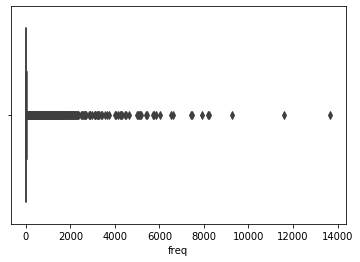

In [36]:
sns.boxplot(artist_grouped['freq'])

We can see the top 10 most widely listened artist , from the dataframe.

In [72]:
release_grouped = dataset.groupby(['release']).agg({'freq': 'count'}).reset_index()
grouped_sum = release_grouped['freq'].sum()
release_grouped['percentage']  = release_grouped['freq'].div(grouped_sum)*100
release_grouped.sort_values(['freq', 'release'], ascending = [0,1])

,release,freq,percentage
98847,Sehr kosmisch,5043,0.338014
125441,Undo,4483,0.300479
136118,You're The One,4270,0.286202
126037,Use Somebody,3822,0.256175
28727,Dog Days Are Over (Radio Edit),3780,0.253360
...,...,...,...
137660,Ã�guas De MarÃ§o,1,0.000067
137661,Ã�gy is jÃ³,1,0.000067
137662,Ã�mame dos veces,1,0.000067
137665,Ã�ngeles De Acero,1,0.000067


In [73]:
release_grouped.sort_values(by = 'freq',ascending=False).head(10)

,release,freq,percentage
98847,Sehr kosmisch,5043,0.338014
125441,Undo,4483,0.300479
136118,You're The One,4270,0.286202
126037,Use Somebody,3822,0.256175
28727,Dog Days Are Over (Radio Edit),3780,0.253360
94017,Revelry,3672,0.246121
98620,Secrets,3456,0.231643
49077,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,0.219310
104370,Somebody To Love,3263,0.218707
47699,Hey_ Soul Sister,2791,0.187070


Top 10 most listened releases

In [74]:
release_grouped['freq'].describe()

count    137674.000000
mean         10.836839
std          56.151440
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max        5043.000000
Name: freq, dtype: float64

In [9]:
song_user = dataframe.groupby(['user_id'],as_index=False)['song_id'].count()
song_user.head()

,user_id,song_id
0,00007a02388c208ea7176479f6ae06f8224355b3,9
1,00014a76ed063e1a749171a253bca9d9a0ff1782,11
2,00015189668691680bb1a2e58afde1541ec92ced,17
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,32


In [10]:
song_user = dataframe.groupby(['user_id']
 ,as_index=False)['song_id'].count()
song_user['song_id'].describe()

count    110000.000000
mean         13.563200
std           8.321648
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: song_id, dtype: float64

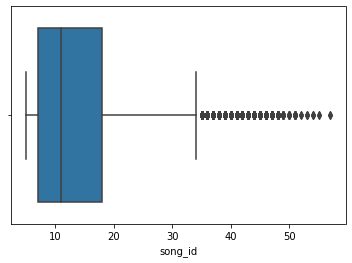

In [12]:
sns.boxplot(song_user['song_id'])

In [9]:
dataframe['user_id'][dataframe['freq']==58].count()

124

In [6]:
user_1 = dataframe[(dataframe['user_id']=='ad4b2717e89766b66b96fe52a38736116e315874')]
user_1.head(2)

,user_id,song_id,freq,track_id,artist_name,release
902982,ad4b2717e89766b66b96fe52a38736116e315874,SOHIKCR12AF72AAD2E,2,TRPNZXS128F9326218,OneRepublic,All This Time
902983,ad4b2717e89766b66b96fe52a38736116e315874,SOBKMNJ12AF729BCA3,2,TRFSYYG128F9326215,OneRepublic,Missing Persons 1 & 2


In [5]:
top_1 = user_1.groupby(['artist_name'],as_index=False)
top_1 = pd.DataFrame()

,artist_name,freq
903029,The Courteeners,10
903023,The Smiths,6
903027,Maroon 5,4
903036,OneRepublic,3
902982,OneRepublic,2
902994,April Stevens,2
902993,The Notting Hillbillies,2
903018,John Mayer,2
903006,OneRepublic,2
903015,John Mayer,2


In [10]:
user_2 = dataframe[(dataframe['user_id']=='316110734d8da7478cc33237458814f770a9eb7a')]
user_2.head(2)

,user_id,song_id,freq,track_id,artist_name,release
1466207,316110734d8da7478cc33237458814f770a9eb7a,SOZCWQA12A6701C798,6,TRZFEOG128E078ECBE,Dr. Dre / Snoop Dogg,The Next Episode
1466208,316110734d8da7478cc33237458814f770a9eb7a,SOTEGWG12AB01897AC,9,TRKFWPM12903CCAB5C,Drake / Kanye West / Lil Wayne / Eminem,Forever


In [12]:
user_2[['artist_name','freq']].
sort_values(by='freq',ascending = False).head(10)

,artist_name,freq
1466252,OneRepublic,18
1466230,Avenged Sevenfold,17
1466236,Five Finger Death Punch,16
1466228,Alliance Ethnik,14
1466223,Black Eyed Peas,10
1466256,Kid Cudi Vs Crookers,10
1466242,Dwight Yoakam,10
1466222,Kid Cudi,9
1466261,Jack Johnson,9
1466210,Cage The Elephant,9
